## AirBnb properties in Seattle

### We will be analysing the AirBnb data to answer a few simple questions:
* When should one go to Seattle? According to this data, which time of the year are the AirBnBs most easily available.
* Which area should one live in? Analysing availability and pricing.
* How does the convinience of renting AirBnbs differ depending on the number of travellers?



#### Importing the required packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from collections import Counter
import ast
from wordcloud import WordCloud

### Importing data

In [3]:
s_list = pd.read_csv("./seattle/listings.csv")

s_cal = pd.read_csv("./seattle/calendar.csv")

s_rev = pd.read_csv("./seattle/reviews.csv")

In [4]:
s_list.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

#### Reducing dataset to variables required

In [346]:
s_lim = s_list[['id','name', 'summary','space', 'description','host_response_time','neighbourhood_group_cleansed','number_of_reviews',
       'accommodates','price', 'weekly_price', 'monthly_price', 'instant_bookable','review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value']]

In [356]:
s_lim.head()

,id,name,summary,space,description,host_response_time,neighbourhood_group_cleansed,number_of_reviews,accommodates,price,weekly_price,monthly_price,instant_bookable,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,within a few hours,Queen Anne,207,4,$85.00,NaN,NaN,f,95.0,10.0,10.0,10.0,10.0,9.0,10.0
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,within an hour,Queen Anne,43,4,$150.00,"$1,000.00","$3,000.00",f,96.0,10.0,10.0,10.0,10.0,10.0,10.0
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,within a few hours,Queen Anne,20,11,$975.00,NaN,NaN,f,97.0,10.0,10.0,10.0,10.0,10.0,10.0
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,NaN,Queen Anne,0,3,$100.00,$650.00,"$2,300.00",f,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,within an hour,Queen Anne,38,6,$450.00,NaN,NaN,f,92.0,9.0,9.0,10.0,10.0,9.0,9.0


### Data set up:
* Summarising the calendar data to get "date_available" variable which will represent the number of days in the year (2016) the property was available to host.
* Merging this aggregated data with our s_lim and call the new data 's'
* Summarise calendar data at a monthly level for seasonal trends in the year, call is s_monthly

In [361]:
s_days_booked = s_available.groupby(['listing_id','available']).count()
s_days_booked.head()

,,date,price
listing_id,available,,
3335,t,309,309
4291,t,365,365
5682,t,309,309
6606,t,365,365
7369,t,53,53


In [362]:
s_days_booked= s_days_booked.reset_index(level=[0,1])
s_days_booked.rename(columns={'date':'days_available'}, inplace=True)
s_days_booked['available'].value_counts()

t    3723
Name: available, dtype: int64

In [363]:
s_days_booked= s_days_booked[s_days_booked['available']=='t']
s= s_lim.merge( s_days_booked, left_on = 'id', right_on='listing_id')
s.head()

,id,name,summary,space,description,host_response_time,neighbourhood_group_cleansed,number_of_reviews,accommodates,price_x,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,listing_id,available,days_available,price_y
0,241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,within a few hours,Queen Anne,207,4,$85.00,...,10.0,10.0,10.0,10.0,9.0,10.0,241032,t,346,346
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,within an hour,Queen Anne,43,4,$150.00,...,10.0,10.0,10.0,10.0,10.0,10.0,953595,t,291,291
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,within a few hours,Queen Anne,20,11,$975.00,...,10.0,10.0,10.0,10.0,10.0,10.0,3308979,t,220,220
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,NaN,Queen Anne,0,3,$100.00,...,NaN,NaN,NaN,NaN,NaN,NaN,7421966,t,143,143
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,within an hour,Queen Anne,38,6,$450.00,...,9.0,9.0,10.0,10.0,9.0,9.0,278830,t,365,365


In [365]:
s_cal.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [367]:
s_cal['date_'] = pd.to_datetime(s_cal['date'])
s_cal['month']=s_cal['date_'].dt.month
s_month= pd.crosstab(s_cal['month'], s_cal['available'])
s_month['total']= s_month['f']+s_month['t']
s_month['availability_percent']= s_month['t']/s_month['total']

In [368]:
s_month

available,f,t,total,availability_percent
month,,,,
1,49603,64937,114540,0.566937
2,37401,73321,110722,0.662208
3,34420,83938,118358,0.709187
4,38503,76037,114540,0.663847
5,38387,79971,118358,0.675670
6,37296,77244,114540,0.674384
7,44136,74222,118358,0.627097
8,42011,76347,118358,0.645051
9,37294,77246,114540,0.674402


### Data cleaning

In [369]:
s["price_x"] = s["price_x"].astype(str).str.replace("$", "")
s["price_x"] = s["price_x"].astype(str).str.replace(",", "")
s["price_x"]=s["price_x"].astype(float)

In [378]:
s.dropna(subset=["price_x"],  inplace =True)

In [379]:
s['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    772
Capitol Hill           548
Downtown               517
Central Area           358
Queen Anne             291
Ballard                228
West Seattle           196
Rainier Valley         157
University District    120
Beacon Hill            116
Cascade                 86
Northgate               77
Delridge                76
Lake City               66
Magnolia                61
Seward Park             43
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

In [374]:
s['accommodates'].value_counts()

2     1593
4      768
3      386
6      325
1      253
5      179
8      108
7       48
10      25
12      14
9       12
16       4
11       3
14       3
15       2
Name: accommodates, dtype: int64

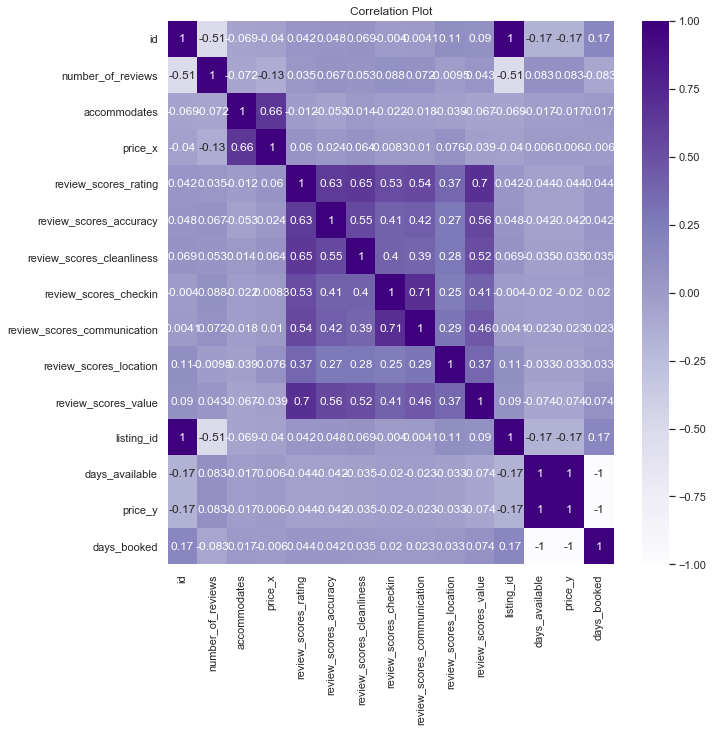

In [372]:
plt.subplots(figsize=(10,10))
ax = plt.axes()
ax.set_title("Correlation Plot")
corr = s.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="Purples", annot=True)

(array([2.203e+03, 1.111e+03, 2.600e+02, 9.000e+01, 3.400e+01, 1.300e+01,
        5.000e+00, 3.000e+00, 1.000e+00, 3.000e+00]),
 array([  20.,  118.,  216.,  314.,  412.,  510.,  608.,  706.,  804.,
         902., 1000.]),
 <a list of 10 Patch objects>)

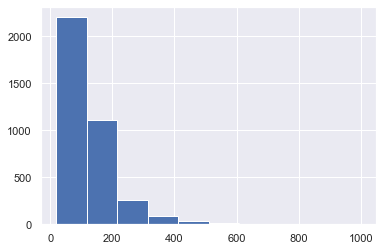

In [373]:
plt.hist(s['price_x'])

## Ananlysing the data

### Q1. Let us look at the availability of AirBnbs to see the seasonality

* One record represents availability of 1 property on a given day. This plot represents availability in a month such that daily availability id weighed in. A propert only avilable half the days in a month will be counted as half a property.

In [382]:
s_month = s_month.reset_index()
s_month

available,month,f,t,total,availability_percent
0,1,49603,64937,114540,0.566937
1,2,37401,73321,110722,0.662208
2,3,34420,83938,118358,0.709187
3,4,38503,76037,114540,0.663847
4,5,38387,79971,118358,0.675670
5,6,37296,77244,114540,0.674384
6,7,44136,74222,118358,0.627097
7,8,42011,76347,118358,0.645051
8,9,37294,77246,114540,0.674402
9,10,35920,82438,118358,0.696514


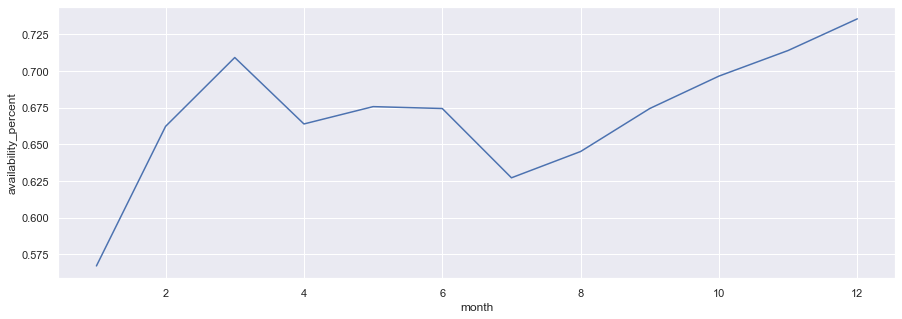

In [383]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
ax = sns.lineplot(x="month", y="availability_percent",
                  data=s_month)

### Q2. Let us see the distriution of AirBnbs and their pricing accross neighbourhoods of Seattle

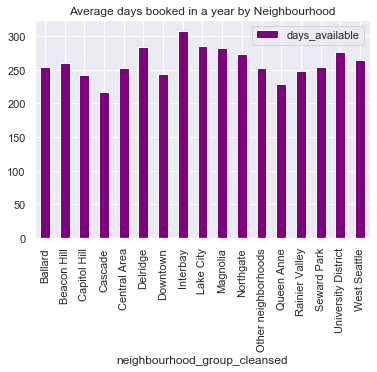

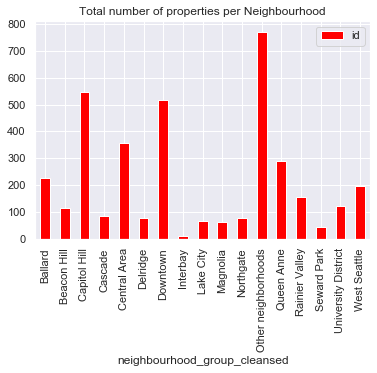

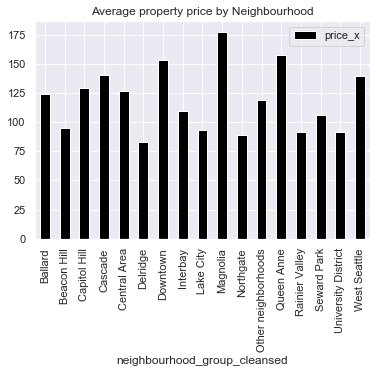

In [386]:
s.groupby(by='neighbourhood_group_cleansed').mean().plot.bar(y='days_available',color='purple', title="Average days booked in a year by Neighbourhood")
s.groupby(by='neighbourhood_group_cleansed').count().plot.bar(y='id',color='red', title="Total number of properties per Neighbourhood")
s.groupby(by='neighbourhood_group_cleansed').mean().plot.bar(y='price_x',color='black', title="Average property price by Neighbourhood")

### Q3. Airbnb distribution for varied number of renters

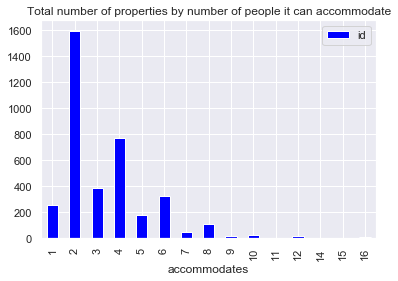

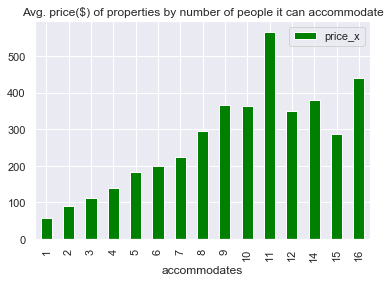

In [385]:
s.groupby(by='accommodates').count().plot.bar(y='id',color='blue', title="Total number of properties by number of people it can accommodate")
s.groupby(by='accommodates').mean().plot.bar(y='price_x',color='green', title="Avg. price($) of properties by number of people it can accommodate")

## Additional work | Appendix

Figure 3


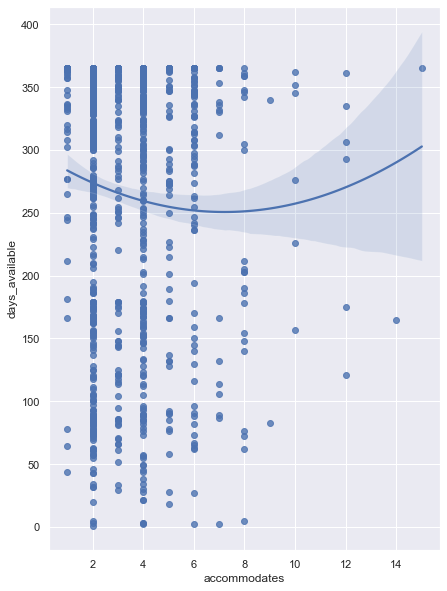

In [258]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 10)
sns.regplot(x='accommodates', y='days_available', data= s,
                 order=2);
print("Figure 3")

In [295]:
s_cal.dtypes

s_cal['month']=s_cal['date_'].dt.month

s_month= pd.crosstab(s_cal['month'], s_cal['available'])

s_month['total']= s_month['f']+s_month['t']
s_month['availability_percent']= s_month['t']/s_month['total']
s_month

listing_id             int64
date                  object
available             object
price                 object
date_         datetime64[ns]
day                   object
dtype: object

In [296]:
s_cal['month']=s_cal['date_'].dt.month

In [310]:
s_month= pd.crosstab(s_cal['month'], s_cal['available'])

In [319]:
#s_month = s_month.reset_index()
s_month['total']= s_month['f']+s_month['t']
s_month['availability_percent']= s_month['t']/s_month['total']
s_month

available,month,f,t,total,availability_percent
0,1,49603,64937,114540,0.566937
1,2,37401,73321,110722,0.662208
2,3,34420,83938,118358,0.709187
3,4,38503,76037,114540,0.663847
4,5,38387,79971,118358,0.675670
5,6,37296,77244,114540,0.674384
6,7,44136,74222,118358,0.627097
7,8,42011,76347,118358,0.645051
8,9,37294,77246,114540,0.674402
9,10,35920,82438,118358,0.696514


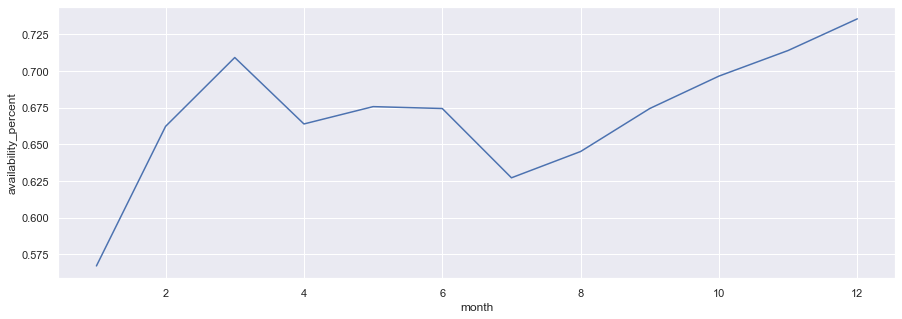

In [324]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
ax = sns.lineplot(x="month", y="availability_percent",
                  data=s_month)

In [244]:
s.dropna(inplace=True)
s["weekly_price"] = s["weekly_price"].str.replace("$", "")
s["weekly_price"] = s["weekly_price"].str.replace(",", "")
s["weekly_price"]=s["weekly_price"].astype(float)

s["monthly_price"] = s["monthly_price"].str.replace("$", "")
s["monthly_price"] = s["monthly_price"].str.replace(",", "")
s["monthly_price"]=s["monthly_price"].astype(float)

In [ ]:
b_list = pd.read_csv("/Users/shreyasurana/Desktop/Udacity_Blog/boston/listings.csv")
b_cal = pd.read_csv("/Users/shreyasurana/Desktop/Udacity_Blog/boston/calendar.csv")
b_rev = pd.read_csv("/Users/shreyasurana/Desktop/Udacity_Blog/boston/reviews.csv")

In [253]:
m1 = sm.OLS(s['days_booked'], sm.add_constant (s[['price_x','accommodates','number_of_reviews','review_scores_rating',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']]).astype(float)).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            days_booked   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.562
Date:                Sun, 03 May 2020   Prob (F-statistic):            0.00647
Time:                        14:09:21   Log-Likelihood:                -6195.7
No. Observations:                1018   AIC:                         1.241e+04
Df Residuals:                    1008   BIC:                         1.246e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -69.2108     62.297     -1.111      0.267    -191.457      53.035
price_x                        -0.1146      0.055     -2.096      0.036      -0.222      -0.007
accommodates                    7.2589      2.325      3.122      0.002       2.696      11.822
number_of_reviews              -0.2498      0.107     -2.337      0.020      -0.459      -0.040
review_scores_rating            1.1320      0.862      1.314      0.189      -0.559       2.823
review_scores_cleanliness       2.3547      5.946      0.396      0.692      -9.314      14.024
review_scores_checkin           5.1353      8.434      0.609      0.543     -11.416      21.686
review_scores_communication    -9.1414      8.814     -1.037      0.300     -26.436       8.154
review_scores_location          7.1941      5.631      1.278      0.202      -3.856      18.245
review_scores_value             0.5141      6.561      0.078      0.938     -12.361      13.389
==============================================================================
Omnibus:                      131.644   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.942
Skew:                           0.836   Prob(JB):                     3.02e-30
Kurtosis:                       2.359   Cond. No.                     3.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [252]:
s_cal['date_'] = pd.to_datetime(s_cal['date'])
s_cal['day'] = s_cal['date_'].dt.day_name()
s_cal.head()

,listing_id,date,available,price,date_,day
0,241032,2016-01-04,t,$85.00,2016-01-04,Monday
1,241032,2016-01-05,t,$85.00,2016-01-05,Tuesday
2,241032,2016-01-06,f,NaN,2016-01-06,Wednesday
3,241032,2016-01-07,f,NaN,2016-01-07,Thursday
4,241032,2016-01-08,f,NaN,2016-01-08,Friday


In [211]:
print("Figure 5")
plt.figure(figsize=(15,5)) 
sns.barplot(x='day',y='freq',data=series, order=["Monday", "Tuesday", "Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.show()

listing_id             int64
date                  object
available             object
price                 object
date_         datetime64[ns]
day                    int64
dtype: object

In [59]:
s_rev.dropna(subset=['comments'], inplace=True)
b_rev.dropna(subset=['comments'], inplace=True)

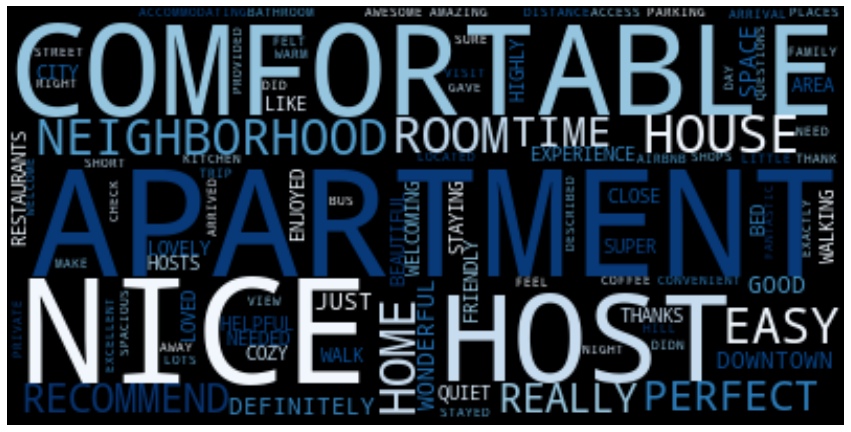

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english",
                        use_idf=True,
                        ngram_range=(1,1), # considering only 1-grams
                        min_df = 0.05,     # cut words present in less than 5% of documents
                        max_df = 0.3)      # cut words present in more than 30% of documents 


tfidf = vectorizer.fit_transform(s_rev['comments'])
def rank_words(terms, feature_matrix):
    sums = feature_matrix.sum(axis=0)
    data = []
    for col, term in enumerate(terms):
        data.append( (term, sums[0,col]) )
    ranked = pd.DataFrame(data, columns=['term','rank']).sort_values('rank', ascending=False)
    return ranked

ranked = rank_words(terms=vectorizer.get_feature_names(), feature_matrix=tfidf)
dic = {ranked.loc[i,'term'].upper(): ranked.loc[i,'rank'] for i in range(0,len(ranked))}

wordcloud = WordCloud(background_color='black',
                      max_words=100,
                      colormap='Blues').generate_from_frequencies(dic)
fig = plt.figure(1,figsize=(15,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()


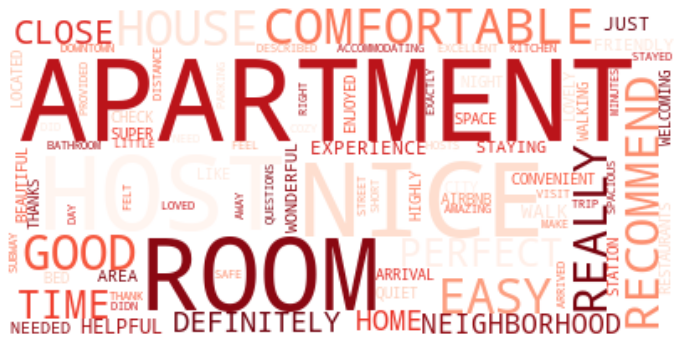

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english",
                        use_idf=True,
                        ngram_range=(1,1), # considering only 1-grams
                        min_df = 0.05,     # cut words present in less than 5% of documents
                        max_df = 0.3)      # cut words present in more than 30% of documents 


tfidf = vectorizer.fit_transform(b_rev['comments'])
def rank_words(terms, feature_matrix):
    sums = feature_matrix.sum(axis=0)
    data = []
    for col, term in enumerate(terms):
        data.append( (term, sums[0,col]) )
    ranked = pd.DataFrame(data, columns=['term','rank']).sort_values('rank', ascending=False)
    return ranked

ranked = rank_words(terms=vectorizer.get_feature_names(), feature_matrix=tfidf)
dic = {ranked.loc[i,'term'].upper(): ranked.loc[i,'rank'] for i in range(0,len(ranked))}

wordcloud = WordCloud(background_color='white',
                      max_words=100,
                      colormap='Reds').generate_from_frequencies(dic)
fig = plt.figure(1,figsize=(12,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()


In [74]:
s_available= s_cal.dropna(subset=['price'])
b_available= b_cal.dropna(subset=['price'])

In [338]:
s_list[s_list['accommodates']==11]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
587,8225635,https://www.airbnb.com/rooms/8225635,20160104002432,2016-01-04,Fields of Dreams: Modern 4bed/3.5ba,This 4 bedroom modern townhome has it all! *Ce...,This newly furnished and remodeled home has mo...,This 4 bedroom modern townhome has it all! *Ce...,none,This 4 bedroom home is central to everything M...,...,NaN,f,NaN,WASHINGTON,f,strict,f,f,10,NaN
1730,9219567,https://www.airbnb.com/rooms/9219567,20160104002432,2016-01-04,Spacious West Seattle house w/views,"Large Craftsman home, sweeping views, close to...",This house was built as a typical Seattle one-...,"Large Craftsman home, sweeping views, close to...",none,This is a quiet neighborhood that is walking d...,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN


In [96]:
s_day_bookid = s_available[s_available['available'=='t']]

KeyError: False

In [91]:
s_available.groupby(by='listing_id').count().plot.line(y='available',color='g')

KeyError: False